In [1]:
# Importar librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import payments_manager as pm
import numpy as np

#pm.help()
pm.init(debug=True)
#pm.info()
df_jo = pm.df('df_jo')
#df_jo.info()



In [2]:
# Excluir datos de noviembre de 2020
df_jo = df_jo[~((df_jo['Mes_created_at'].dt.year == 2020) & (df_jo['Mes_created_at'].dt.month == 11))]

# Calcular métricas mensuales
monthly_data = df_jo.groupby('Mes_created_at').agg(
    # Calcular el total de fees donde 'stat_fe' == 'accepted'
    total_fees=('fee', lambda x: x[df_jo.loc[x.index, 'stat_fe'] == 'accepted'].sum()),

    # Calcular el total de adelantos donde 'cash_request_received_date' no es nulo
    total_adelantos=(
        'id_cr', 
        lambda ids: df_jo.loc[ids.index]
            .drop_duplicates(subset='id_cr')
            .loc[df_jo.loc[ids.index, 'cash_request_received_date'].notna(), 'amount']
            .sum()
    ),
    
    # Calcular el total de fees donde 'transfer_type' == 'regular' y 'stat_fe' == 'accepted'
    total_fees_regular=('fee', lambda x: x[
        (df_jo.loc[x.index, 'transfer_type'] == 'regular') & 
        (df_jo.loc[x.index, 'stat_fe'] == 'accepted')
    ].sum()),
    
    # Calcular el total de adelantos donde 'transfer_type' == 'regular' y 'cash_request_received_date' no es nulo
    total_adelantos_regular=(
        'amount',
        lambda x: x[df_jo.loc[x.index, 'transfer_type'] == 'regular']
            .loc[df_jo.loc[x.index, 'cash_request_received_date'].notna()]
            .sum()
    ),
    
    # Calcular el total de adelantos donde 'transfer_type' == 'instant' y 'cash_request_received_date' no es nulo
    total_adelantos_instant=(
        'amount',
        lambda x: x[df_jo.loc[x.index, 'transfer_type'] == 'instant']
            .loc[df_jo.loc[x.index, 'cash_request_received_date'].notna()]
            .sum()
    ),
    
    # Calcular el total de fees donde 'transfer_type' == 'instant' y 'stat_fe' == 'accepted'
    total_fees_instant=('fee', lambda x: x[
        (df_jo.loc[x.index, 'transfer_type'] == 'instant') & 
        (df_jo.loc[x.index, 'stat_fe'] == 'accepted')
    ].sum())
).reset_index()

# Calcular el ratio de fees sobre adelantos
monthly_data['fees_ratio'] = monthly_data['total_fees'] / monthly_data['total_adelantos'] * 100

# Calcular el ratio de fees sobre adelantos para transferencias 'regular'
monthly_data['fees_ratio_regular'] = (
    monthly_data['total_fees_regular'] / monthly_data['total_adelantos_regular'] * 100
)

# Calcular el ratio de fees sobre adelantos para transferencias 'instant'
monthly_data['fees_ratio_instant'] = (
    monthly_data['total_fees_instant'] / monthly_data['total_adelantos_instant'] * 100
)

# Mostrar la evolución mensual
print(monthly_data)


   Mes_created_at  total_fees  total_adelantos  total_fees_regular  \
0         2019-11         0.0              0.0                 0.0   
1         2019-12         0.0          16349.0                 0.0   
2         2020-01         0.0          10579.0                 0.0   
3         2020-02         0.0          10625.0                 0.0   
4         2020-03         0.0          16200.0                 0.0   
5         2020-04         0.0          31333.0                 0.0   
6         2020-05       520.0          57223.0               520.0   
7         2020-06      4685.0         153973.0              4685.0   
8         2020-07      5160.0         184061.0              4130.0   
9         2020-08     11695.0         178451.0               850.0   
10        2020-09     16785.0         224121.0               310.0   
11        2020-10     34840.0         459082.0               225.0   

    total_adelantos_regular  total_adelantos_instant  total_fees_instant  \
0            

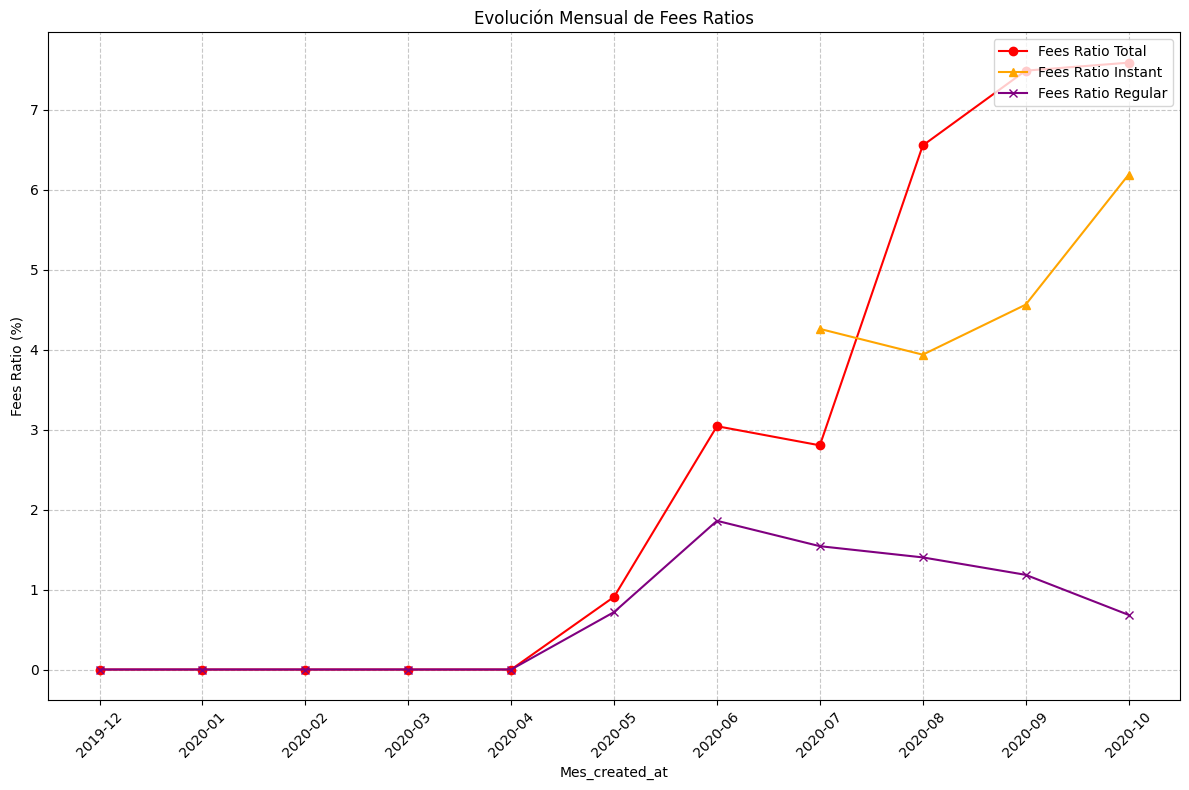

In [3]:
# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar los tres ratios en el eje principal
ax.plot(
    monthly_data['Mes_created_at'].astype(str), 
    monthly_data['fees_ratio'], 
    marker='o', 
    label='Fees Ratio Total', 
    color='red'
)
ax.plot(
    monthly_data['Mes_created_at'].astype(str), 
    monthly_data['fees_ratio_instant'], 
    marker='^', 
    label='Fees Ratio Instant', 
    color='orange'
)
ax.plot(
    monthly_data['Mes_created_at'].astype(str), 
    monthly_data['fees_ratio_regular'], 
    marker='x', 
    label='Fees Ratio Regular', 
    color='purple'
)

# Configurar etiquetas y título
ax.set_xlabel('Mes_created_at')
ax.set_ylabel('Fees Ratio (%)')
ax.set_title('Evolución Mensual de Fees Ratios')
ax.legend(loc='upper right')  # Mostrar la leyenda
ax.grid(True, linestyle='--', alpha=0.7)

# Rotar las etiquetas del eje x para mejor visualización
plt.xticks(rotation=45)

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()


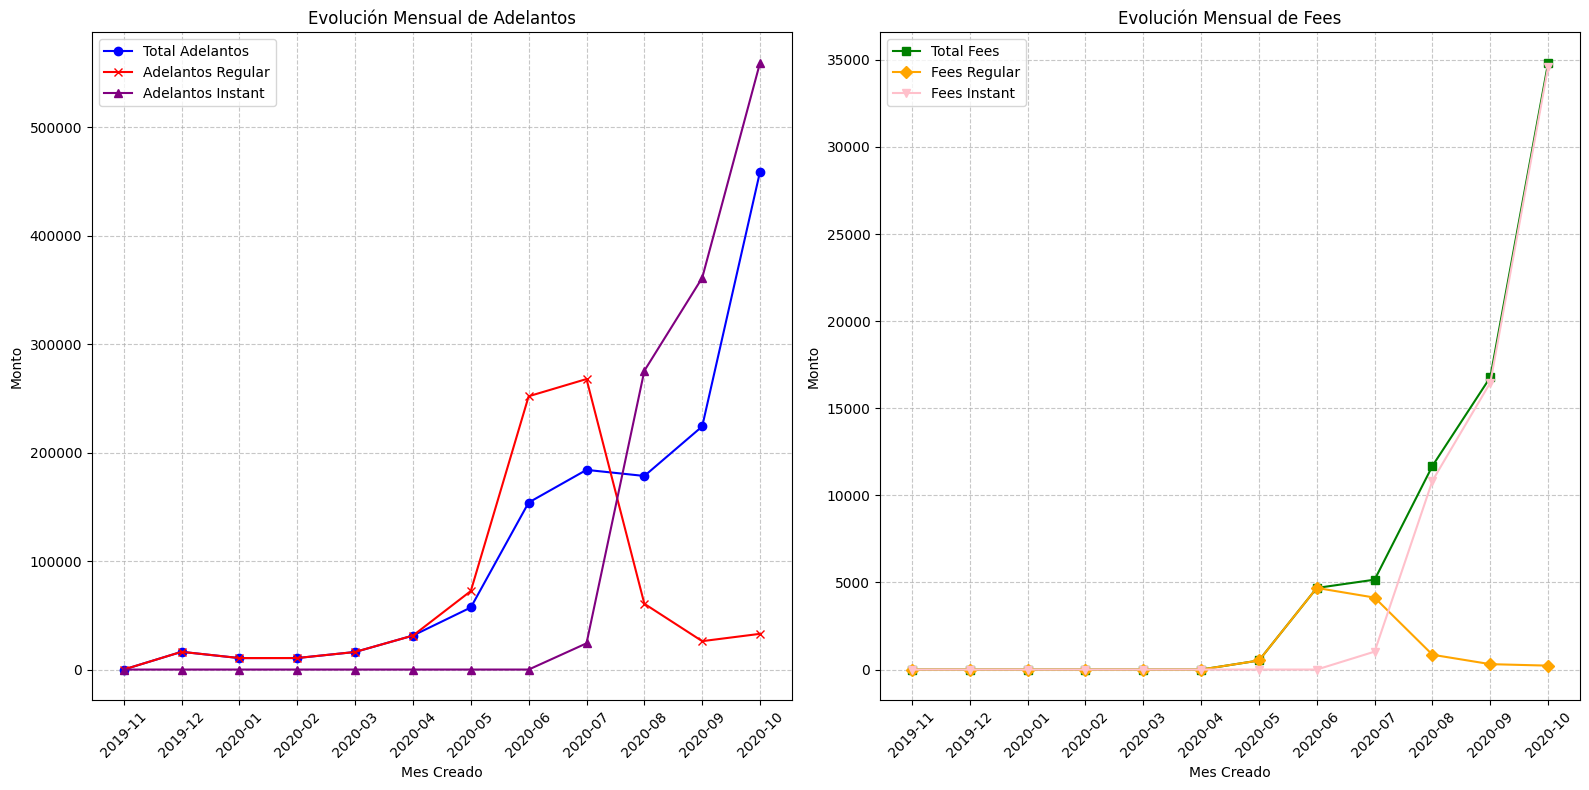

In [4]:
# Crear la figura y los ejes para dos gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Graficar adelantos en el primer gráfico
ax1.plot(
    monthly_data['Mes_created_at'].astype(str),  # Convertir las fechas a formato de texto para el eje X
    monthly_data['total_adelantos'],  # Datos de adelantos
    marker='o',  # Marcadores circulares
    label='Total Adelantos',  # Etiqueta de la línea
    color='blue'  # Color azul
)
ax1.plot(
    monthly_data['Mes_created_at'].astype(str), 
    monthly_data['total_adelantos_regular'], 
    marker='x',  # Marcadores en forma de cruz
    label='Adelantos Regular', 
    color='red'  # Color rojo
)
ax1.plot(
    monthly_data['Mes_created_at'].astype(str), 
    monthly_data['total_adelantos_instant'], 
    marker='^',  # Marcadores en forma de triángulo
    label='Adelantos Instant', 
    color='purple'  # Color púrpura
)

# Configurar etiquetas y título para el gráfico de adelantos
ax1.set_xlabel('Mes Creado')  # Etiqueta del eje X
ax1.set_ylabel('Monto')  # Etiqueta del eje Y
ax1.set_title('Evolución Mensual de Adelantos')  # Título del gráfico
ax1.legend()  # Mostrar la leyenda para las líneas
ax1.grid(True, linestyle='--', alpha=0.7)  # Configurar la cuadrícula
ax1.tick_params(axis='x', rotation=45)  # Rotar las etiquetas del eje X

# Graficar fees en el segundo gráfico
ax2.plot(
    monthly_data['Mes_created_at'].astype(str), 
    monthly_data['total_fees'], 
    marker='s',  # Marcadores cuadrados
    label='Total Fees', 
    color='green'  # Color verde
)
ax2.plot(
    monthly_data['Mes_created_at'].astype(str), 
    monthly_data['total_fees_regular'], 
    marker='D',  # Marcadores en forma de rombo
    label='Fees Regular', 
    color='orange'  # Color naranja
)
ax2.plot(
    monthly_data['Mes_created_at'].astype(str), 
    monthly_data['total_fees_instant'], 
    marker='v',  # Marcadores en forma de triángulo invertido
    label='Fees Instant', 
    color='pink'  # Color rosa
)

# Configurar etiquetas y título para el gráfico de fees
ax2.set_xlabel('Mes Creado')  # Etiqueta del eje X
ax2.set_ylabel('Monto')  # Etiqueta del eje Y
ax2.set_title('Evolución Mensual de Fees')  # Título del gráfico
ax2.legend()  # Mostrar la leyenda para las líneas
ax2.grid(True, linestyle='--', alpha=0.7)  # Configurar la cuadrícula
ax2.tick_params(axis='x', rotation=45)  # Rotar las etiquetas del eje X

# Ajustar el layout para que todo se vea bien
plt.tight_layout()  # Ajustar los elementos para evitar que se superpongan

# Mostrar los gráficos
plt.show()  # Mostrar la figura con los gráficos


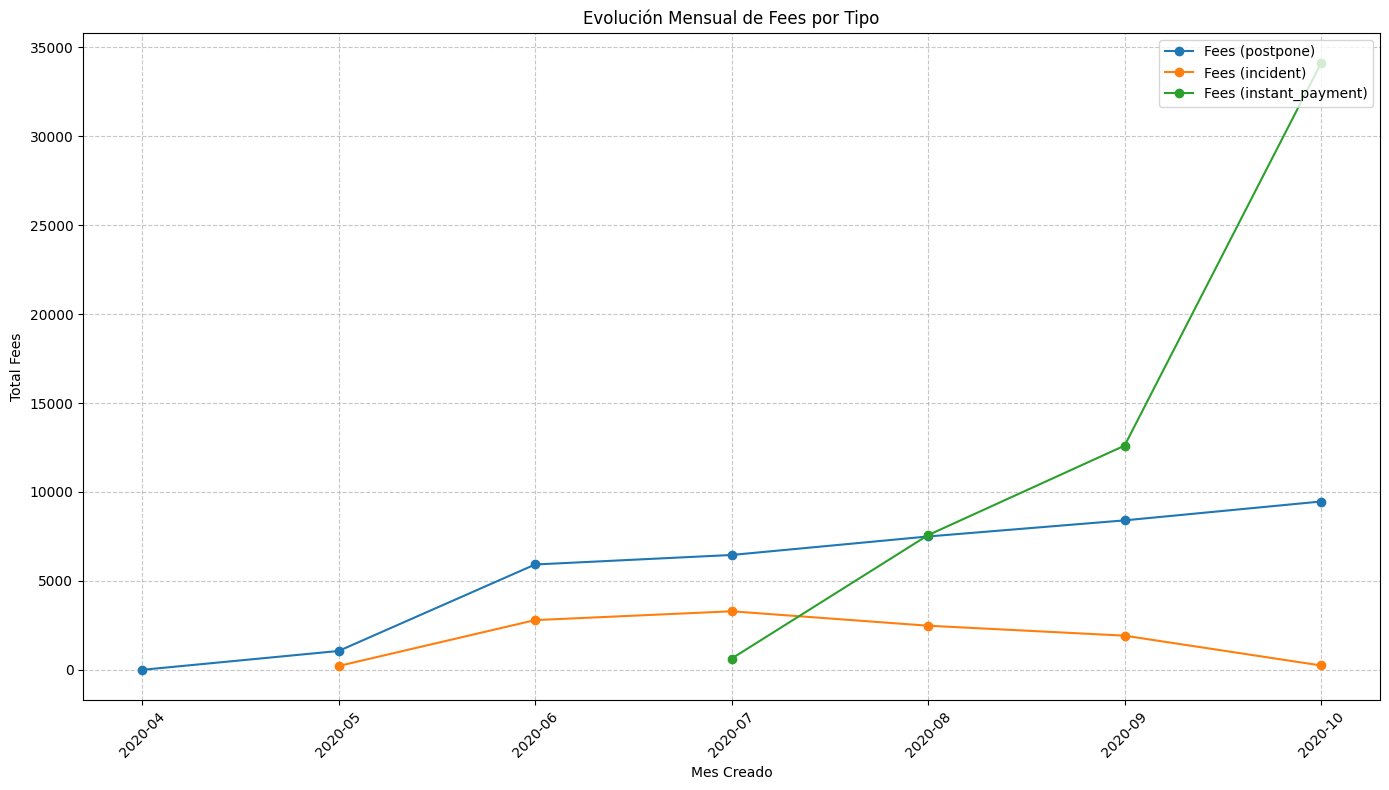

In [5]:
# Excluir datos de noviembre de 2020
df_jo = df_jo[~((df_jo['Mes_created_at'].dt.year == 2020) & (df_jo['Mes_created_at'].dt.month == 11))]

# Filtrar los datos por tipos específicos
filtered_data = df_jo[df_jo['type'].isin(['incident', 'postpone', 'instant_payment'])]

# Ordenar por 'Mes_created_at' en orden ascendente
filtered_data = filtered_data.sort_values(by='Mes_created_at', ascending=True)

# Agrupar por mes y tipo, calculando el total de fees
fees_by_type = filtered_data.groupby(['Mes_created_at', 'type'])['fee'].sum().reset_index()

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(14, 8))

# Obtener los tipos únicos y asignar colores
types = fees_by_type['type'].unique()
colors = plt.cm.tab10(range(len(types)))

# Graficar los fees por cada tipo
for t, color in zip(types, colors):
    type_data = fees_by_type[fees_by_type['type'] == t]
    ax.plot(
        type_data['Mes_created_at'].astype(str),  # Convertir las fechas a cadenas
        type_data['fee'],  # Monto de fees
        marker='o',  # Marcadores circulares
        label=f'Fees ({t})',  # Etiqueta con el tipo
        color=color  # Color asignado
    )

# Configurar etiquetas y título
ax.set_xlabel('Mes Creado')  # Etiqueta del eje X
ax.set_ylabel('Total Fees')  # Etiqueta del eje Y
ax.set_title('Evolución Mensual de Fees por Tipo')  # Título del gráfico
ax.legend(loc='upper right')  # Mostrar la leyenda
ax.grid(True, linestyle='--', alpha=0.7)  # Cuadrícula con estilo y opacidad

# Rotar las etiquetas del eje X para mejor visualización
plt.xticks(rotation=45)

# Ajustar el diseño para que todo se vea bien
plt.tight_layout()  # Ajuste automático del diseño
plt.show()  # Mostrar el gráfico

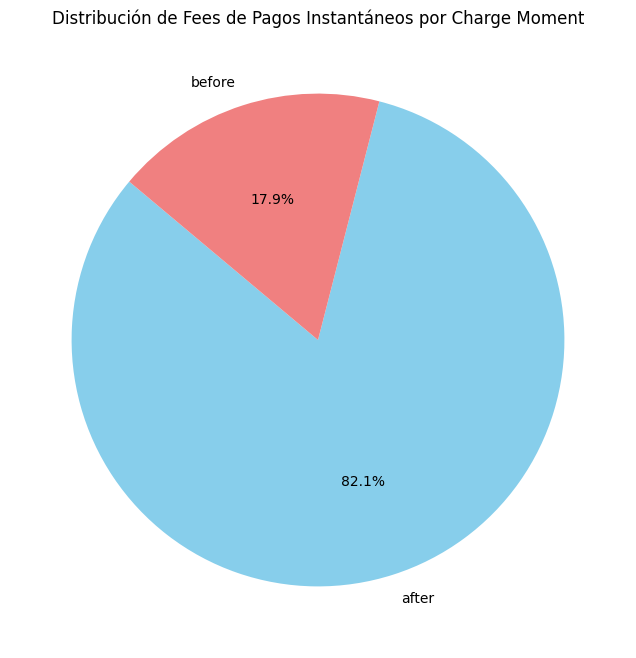

In [6]:
# Filtrar pagos instantáneos
instant_fees = df_jo[df_jo['transfer_type'] == 'instant']

# Agrupar por 'charge_moment' y calcular la suma total de fees
fees_by_charge_moment = (
    instant_fees.groupby('charge_moment')['fee']
    .sum()
    .reset_index()
)

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))  # Configurar el tamaño de la figura
plt.pie(
    fees_by_charge_moment['fee'],  # Datos de los fees
    labels=fees_by_charge_moment['charge_moment'],  # Etiquetas de los momentos de carga
    autopct='%1.1f%%',  # Mostrar el porcentaje en el gráfico
    startangle=140,  # Ángulo de inicio del gráfico de pastel
    colors=['skyblue', 'lightcoral']  # Colores para las porciones del pastel
)

# Configurar el título del gráfico
plt.title('Distribución de Fees de Pagos Instantáneos por Charge Moment')

# Mostrar el gráfico
plt.show()


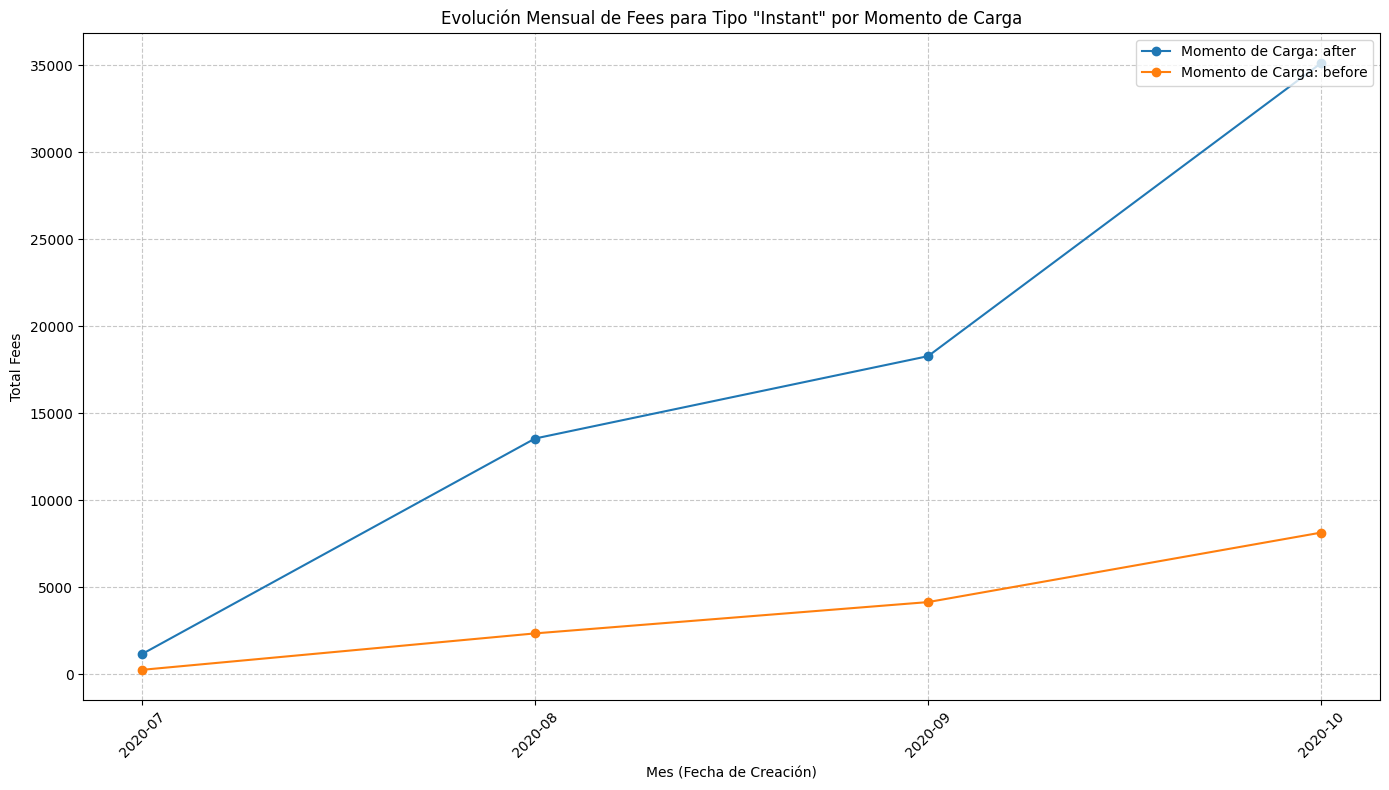

In [7]:
# Filtrar datos por el tipo 'instant'
instant_data = df_jo[df_jo['transfer_type'] == 'instant']

# Agrupar por 'Mes_created_at' y 'charge_moment', calculando el total de fees
fees_by_charge_moment = instant_data.groupby(['Mes_created_at', 'charge_moment'])['fee'].sum().reset_index()

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(14, 8))  # Tamaño de la figura

# Obtener los valores únicos de 'charge_moment' y asignar colores
charge_moments = fees_by_charge_moment['charge_moment'].unique()
colors = plt.cm.tab10(range(len(charge_moments)))  # Colores para cada 'charge_moment'

# Graficar los fees por cada momento de cargo
for cm, color in zip(charge_moments, colors):
    charge_moment_data = fees_by_charge_moment[fees_by_charge_moment['charge_moment'] == cm]
    ax.plot(
        charge_moment_data['Mes_created_at'].astype(str),  # Convertir fechas a cadenas
        charge_moment_data['fee'],  # Monto de fees
        marker='o', 
        label=f'Momento de Carga: {cm}',  # Etiqueta con el momento de carga
        color=color
    )

# Configurar etiquetas y título del gráfico
ax.set_xlabel('Mes (Fecha de Creación)')
ax.set_ylabel('Total Fees')
ax.set_title('Evolución Mensual de Fees para Tipo "Instant" por Momento de Carga')

# Mostrar la leyenda en la esquina superior derecha
ax.legend(loc='upper right')

# Mostrar una cuadrícula para facilitar la lectura
ax.grid(True, linestyle='--', alpha=0.7)

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45)

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()



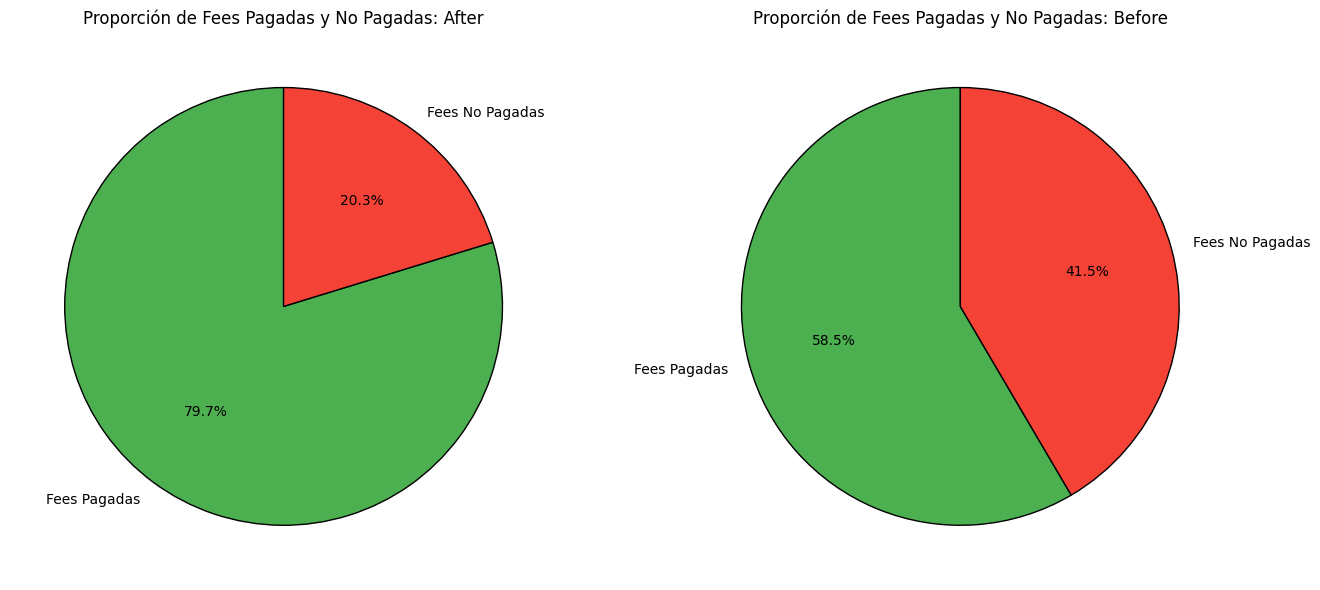

In [8]:
# Filtrar pagos instantáneos
instant_fees = df_jo[df_jo['transfer_type'] == 'instant']

# Agrupar por 'charge_moment' y calcular métricas de fees
fees_summary = instant_fees.groupby('charge_moment').agg(
    # Contar las fees pagadas (donde 'stat_fe' es 'accepted')
    paid_fees=('stat_fe', lambda x: (x == 'accepted').sum()),
    # Contar las fees no pagadas (donde 'stat_fe' no es 'accepted')
    non_paid_fees=('stat_fe', lambda x: (x != 'accepted').sum()),
).reset_index()

# Crear gráficos de pastel para 'before' y 'after'
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Crear 2 subgráficos (1 fila, 2 columnas)

# Iterar sobre cada grupo de 'charge_moment' (before, after)
for idx, moment in enumerate(fees_summary['charge_moment'].unique()):
    # Filtrar los datos del momento actual
    data = fees_summary[fees_summary['charge_moment'] == moment]
    
    # Datos para el gráfico de pastel
    labels = ['Fees Pagadas', 'Fees No Pagadas']  # Etiquetas del gráfico
    sizes = [data['paid_fees'].values[0], data['non_paid_fees'].values[0]]  # Tamaños de las porciones
    colors = ['#4caf50', '#f44336']  # Colores para las porciones (verde y rojo)

    # Graficar el pastel en el subgráfico correspondiente
    axes[idx].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
    axes[idx].set_title(f'Proporción de Fees Pagadas y No Pagadas: {moment.capitalize()}')

# Ajustar el diseño para que los gráficos no se superpongan
plt.tight_layout()

# Mostrar los gráficos
plt.show()



INSIGHT: SERVICIO DE COBRO POR ANTICIPADO DE FEES NOS AFECTA A LA COBRABILIDAD DE ESTOS FEES. SUGIERO QUITAR ESTE SERVICIO

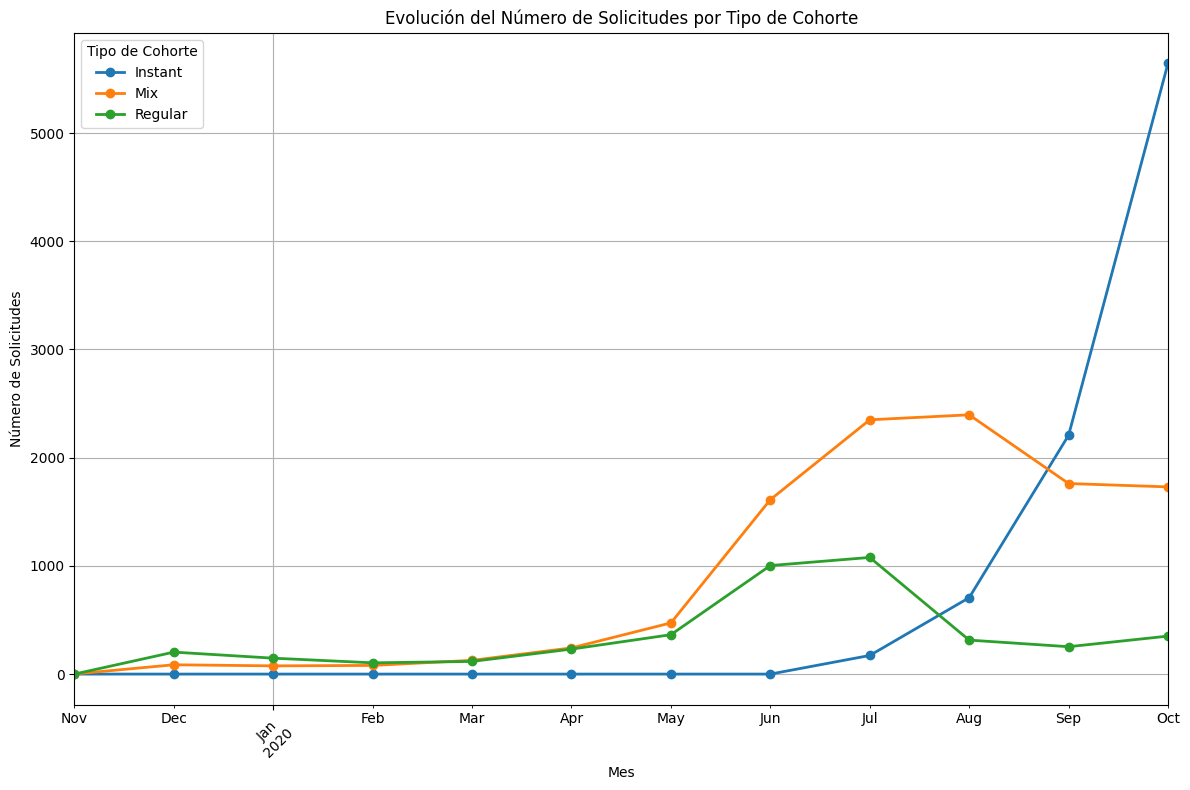

In [9]:
# Filtrar el DataFrame para clientes con transfer_type 'regular' y 'instant'
regular_clients = df_jo[df_jo['transfer_type'] == 'regular']
instant_clients = df_jo[df_jo['transfer_type'] == 'instant']

# Identificar los usuarios únicos en cada tipo de transferencia
regular_users = set(regular_clients['user_id'].unique())  # Conjunto de usuarios de tipo 'regular'
instant_users = set(instant_clients['user_id'].unique())  # Conjunto de usuarios de tipo 'instant'

# Clientes con 'regular' o 'instant' solamente (sin mezcla)
regular_only_users = regular_users - instant_users  # Usuarios solo 'regular'
instant_only_users = instant_users - regular_users  # Usuarios solo 'instant'

# Clientes con una mezcla de 'regular' e 'instant'
mix_users = regular_users & instant_users  # Usuarios que son tanto 'regular' como 'instant'

# Asignar la cohorte a cada usuario en el DataFrame original
def assign_cohort(user_id):
    if user_id in regular_only_users:
        return 'Regular'  # Cohorte 'Regular'
    elif user_id in instant_only_users:
        return 'Instant'  # Cohorte 'Instant'
    elif user_id in mix_users:
        return 'Mix'  # Cohorte 'Mix'
    else:
        return 'Other'  # En caso de usuarios que no encajan en ninguna cohorte

# Asignar la cohorte a cada usuario en el DataFrame
df_jo['cohort'] = df_jo['user_id'].apply(assign_cohort)

# Calcular el número de solicitudes únicas por cohorte y mes
monthly_requests_cohort = df_jo.groupby([df_jo['Mes_created_at'], 'cohort'])['id_cr'].nunique().unstack(fill_value=0)

# Crear el gráfico
plt.figure(figsize=(12, 8))

# Graficar los datos para cada tipo de cohorte
monthly_requests_cohort.plot(kind='line', marker='o', linestyle='-', linewidth=2, ax=plt.gca())

# Configurar título y etiquetas del gráfico
plt.title('Evolución del Número de Solicitudes por Tipo de Cohorte')  # Título del gráfico
plt.ylabel('Número de Solicitudes')  # Etiqueta del eje Y
plt.xlabel('Mes')  # Etiqueta del eje X
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejor visualización
plt.legend(title='Tipo de Cohorte', loc='upper left')  # Leyenda con título
plt.grid(True)  # Añadir cuadrícula
plt.tight_layout()  # Ajustar el diseño para evitar superposiciones
plt.show()  # Mostrar el gráfico




In [10]:
# Crear columna 'Cohorte' que indica el mes de la primera solicitud de cada cliente
df_jo['Cohorte'] = df_jo.groupby('user_id')['created_at'].transform('min').dt.to_period('M')
df_jo.head(10)

,id_cr,id_fe,fe_cr_id,user_id,created_at,created_at_fe,amount,fee,stat_cr,stat_fe,...,moderated_at,reason,category,from_date,to_date,recovery_status,Mes_created_at,cash_request_received_date,cohort,Cohorte
0,5,0,NaN,804,2019-12-10 19:05:21.596873,NaT,100.0,NaN,rejected,NaN,...,2019-12-11 16:47:42.405646,NaN,NaN,NaT,NaT,nice,2019-12,NaT,Regular,2019-12
1,70,0,NaN,231,2019-12-10 19:50:12.347780,NaT,100.0,NaN,rejected,NaN,...,2019-12-11 14:24:22.897988,NaN,NaN,NaT,NaT,nice,2019-12,NaT,Mix,2019-12
2,7,0,NaN,191,2019-12-10 19:13:35.825460,NaT,100.0,NaN,rejected,NaN,...,2019-12-11 09:46:59.777728,NaN,NaN,NaT,NaT,nice,2019-12,NaT,Regular,2019-12
3,10,0,NaN,761,2019-12-10 19:16:10.880172,NaT,99.0,NaN,rejected,NaN,...,2019-12-18 14:26:18.128407,NaN,NaN,NaT,NaT,nice,2019-12,NaT,Regular,2019-12
4,1594,0,NaN,7686,2020-05-06 09:59:38.877376,NaT,100.0,NaN,rejected,NaN,...,2020-05-07 09:21:55.320193,NaN,NaN,NaT,NaT,nice,2020-05,NaT,Regular,2020-05
5,2145,0,NaN,9489,2020-05-23 20:58:55.129432,NaT,100.0,NaN,money_back,NaN,...,2020-05-24 12:40:33.054910,NaN,NaN,NaT,NaT,completed,2020-05,2020-05-26,Mix,2020-05
6,3512,0,NaN,14631,2020-06-16 17:07:38.452652,NaT,100.0,NaN,rejected,NaN,...,2020-06-17 10:21:21.360742,NaN,NaN,NaT,NaT,nice,2020-06,NaT,Mix,2020-06
7,654,0,NaN,99000309,2020-02-10 01:11:53.808270,NaT,100.0,NaN,rejected,NaN,...,2020-02-10 09:11:21.350695,NaN,NaN,NaT,NaT,nice,2020-02,NaT,Regular,2020-01
8,5672,0,NaN,99002499,2020-06-28 12:06:33.712840,NaT,100.0,NaN,canceled,NaN,...,NaT,NaN,NaN,NaT,NaT,nice,2020-06,NaT,Regular,2020-06
9,71,0,NaN,897,2019-12-10 19:51:23.911206,NaT,90.0,NaN,rejected,NaN,...,2019-12-12 15:06:11.190299,NaN,NaN,NaT,NaT,nice,2019-12,NaT,Regular,2019-12


In [11]:
# Agrupar los datos por cohorte y mes para calcular las métricas mensuales
cohort_analysis = df_jo.groupby(['Cohorte', 'Mes_created_at']).agg(
    Num_Clientes=('user_id', 'nunique'),  # Número de clientes únicos por cohorte y mes
    Num_Solicitudes=('id_cr', 'nunique'),  # Total de solicitudes únicas por cohorte y mes
    Solicitudes_Instant=('transfer_type', lambda x: (x == 'instant').sum()),  # Solicitudes tipo 'instant' por cohorte y mes
    Solicitudes_Regular=('transfer_type', lambda x: (x == 'regular').sum()),  # Solicitudes tipo 'regular' por cohorte y mes
    Clientes_con_fees=('fee', lambda x: (x > 0).sum()),  # Clientes con fees por cohorte y mes
    CR=('id_cr', lambda ids: df_jo[df_jo['id_cr'].isin(ids) & df_jo['cash_request_received_date'].notnull()]['amount'].sum()),

    Fees=('fee', 'sum'),  # Total de fees por cohorte y mes
    # Contar las líneas con 'stat_fe' == 'accepted'
    paid_fees=('stat_fe', lambda x: (x == 'accepted').sum()),  
    # Contar las líneas con 'stat_fe' != 'accepted'
    non_paid_fees=('stat_fe', lambda x: (x != 'accepted').sum()),
    # Sumar 'total_amount' cuando 'stat_fe' == 'accepted'
    total_paid_fees=('fee', lambda x: x[df_jo.loc[x.index, 'stat_fe'] == 'accepted'].sum()),
    # Sumar 'total_amount' cuando 'stat_fe' != 'accepted'
    total_non_paid_fees=('fee', lambda x: x[df_jo.loc[x.index, 'stat_fe'] != 'accepted'].sum()),
     # Contar las líneas con 'stat_cr' == 'money_back'
    paid_cr=('stat_cr', lambda x: (x == 'money_back').sum()),  
    # Contar las líneas con 'stat_fe' != 'accepted'
    non_paid_cr=('stat_cr', lambda x: (x != 'money_back').sum()),
    # Sumar 'total_amount' cuando 'stat_fe' == 'accepted'
    total_paid_cr=('amount', lambda x: x[df_jo.loc[x.index, 'stat_cr'] == 'money_back'].sum()),
    # Sumar 'total_amount' cuando 'stat_fe' != 'accepted'
    total_non_paid_cr=('amount', lambda x: x[df_jo.loc[x.index, 'stat_cr'] != 'money_back'].sum()),
    # Métrica de "credit lapse" (diferencia entre reimbursement_date y created_at)
    credit_lapse=('reimbursement_date', lambda x: (x - df_jo.loc[x.index, 'created_at']).dt.days.mean()),
    # Métrica de "credit payment lapse" (diferencia entre money_back_date y reimbursement_date)
    credit_payment_lapse=('money_back_date', lambda x: (x - df_jo.loc[x.index, 'reimbursement_date']).dt.days.mean())

).reset_index()

# Calcular los porcentajes de non_paid_fees
cohort_analysis['paid_fees_percent_qty'] = (cohort_analysis['paid_fees'] / (cohort_analysis['paid_fees'] + cohort_analysis['non_paid_fees']))
cohort_analysis['paid_fees_percent_amount'] = (cohort_analysis['total_paid_fees'] / cohort_analysis['Fees'])   # % en monto
cohort_analysis['paid_cr_percent_qty'] = (cohort_analysis['paid_cr'] / (cohort_analysis['paid_cr'] + cohort_analysis['non_paid_cr']))
cohort_analysis['paid_cr_percent_amount'] = (cohort_analysis['total_paid_cr'] / cohort_analysis['CR'])   # % en monto
cohort_analysis['index'] = (cohort_analysis['total_paid_fees'] / cohort_analysis['total_paid_cr'])   # % index

# Eliminar las columnas de pago y no pago
cohort_sizes_monthly = cohort_analysis.drop(
    ['paid_fees', 'non_paid_fees', 'total_paid_fees', 'total_non_paid_fees','paid_cr', 'non_paid_cr', 'total_paid_cr', 'total_non_paid_cr'], axis=1, errors='ignore')

# Mostrar los resultados de las cohortes por mes
cohort_analysis

,Cohorte,Mes_created_at,Num_Clientes,Num_Solicitudes,Solicitudes_Instant,Solicitudes_Regular,Clientes_con_fees,CR,Fees,paid_fees,...,non_paid_cr,total_paid_cr,total_non_paid_cr,credit_lapse,credit_payment_lapse,paid_fees_percent_qty,paid_fees_percent_amount,paid_cr_percent_qty,paid_cr_percent_amount,index
0,2019-11,2019-11,1,1,0,1,0,0.0,0.0,0,...,1,0.0,1.0,16.000000,NaN,0.000000,NaN,0.000000,NaN,NaN
1,2019-11,2019-12,1,1,0,1,0,0.0,0.0,0,...,1,0.0,100.0,6.000000,NaN,0.000000,NaN,0.000000,NaN,NaN
2,2019-11,2020-04,1,1,0,1,0,100.0,0.0,0,...,0,100.0,0.0,14.000000,8.000000,0.000000,NaN,1.000000,1.000000,0.000000
3,2019-11,2020-05,1,1,0,5,5,50.0,25.0,1,...,0,50.0,0.0,125.000000,-45.000000,0.200000,0.200000,1.000000,1.000000,0.100000
4,2019-11,2020-08,1,1,2,0,2,20.0,10.0,2,...,0,20.0,0.0,55.000000,-8.000000,1.000000,1.000000,1.000000,1.000000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2020-08,2020-09,291,342,433,59,351,27020.0,1755.0,253,...,179,23710.0,11810.0,34.894309,7.150150,0.514228,0.720798,0.636179,0.877498,0.053353
69,2020-08,2020-10,245,279,310,29,283,21510.0,1415.0,230,...,43,23430.0,3280.0,24.241888,4.027027,0.678466,0.812721,0.873156,1.089261,0.049082
70,2020-09,2020-09,1989,2221,3158,204,2379,190776.0,11895.0,1643,...,1186,178558.0,85449.0,31.351279,9.300627,0.488697,0.690626,0.647234,0.935956,0.046007
71,2020-09,2020-10,680,728,867,70,846,55440.0,4230.0,635,...,117,57985.0,7585.0,24.610459,4.122892,0.677695,0.750591,0.875133,1.045905,0.054756


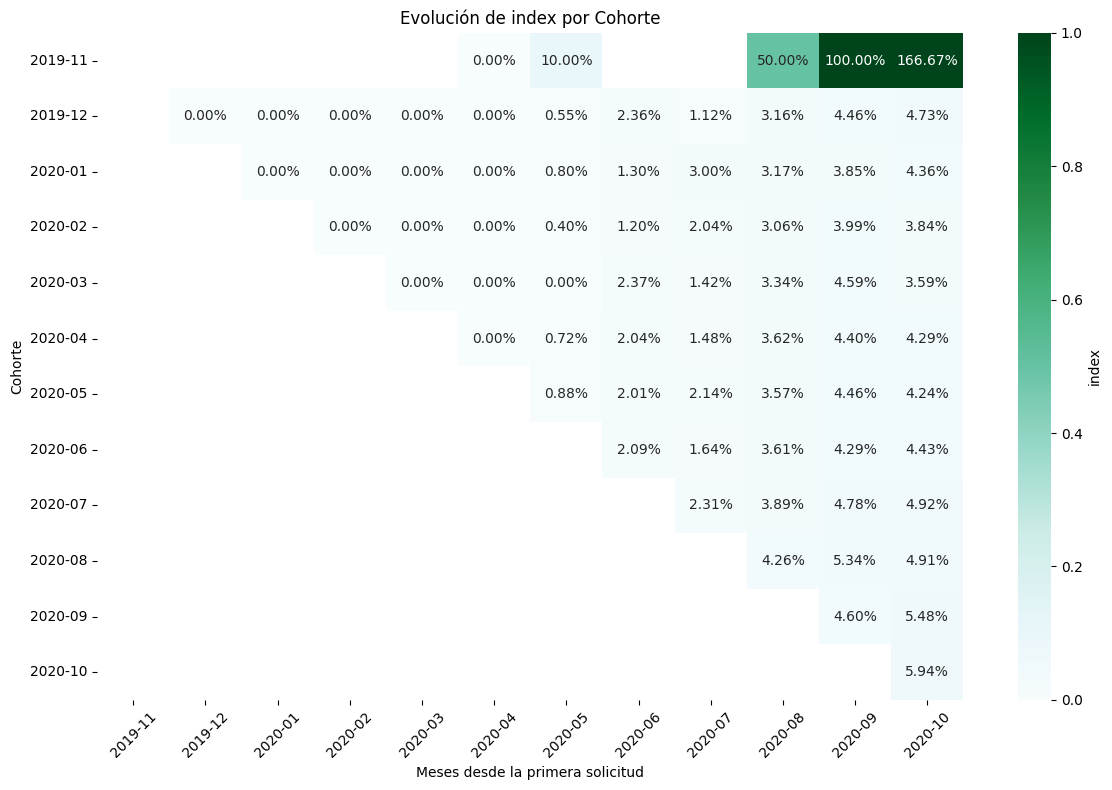

In [12]:
# Pivotar los datos para crear una matriz de index por cohorte para cada mes
paid_fees_heatmap_data = cohort_analysis.pivot(index='Cohorte', columns='Mes_created_at', values='index')

# Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(paid_fees_heatmap_data, annot=True, fmt='.2%', vmin=0.0, vmax=1.0, cmap='BuGn', cbar_kws={'label': 'index'})

# Añadir etiquetas y título
plt.title('Evolución de index por Cohorte')
plt.xlabel('Meses desde la primera solicitud')
plt.ylabel('Cohorte')
plt.xticks(rotation=45)

# Mostrar el heatmap
plt.tight_layout()
plt.show()


In [13]:
cohort_analysis_2 = (
    df_jo.groupby(['user_id', 'Mes_created_at'], as_index=False)
    .agg(
        # Sumar los valores de 'fee' donde 'stat_fe' es igual a 'accepted'
        total_paid_fees=('fee', lambda x: x[df_jo.loc[x.index, 'stat_fe'] == 'accepted'].sum()),
        
        # Contar los valores únicos de 'stat_cr' donde su valor sea 'money_back'
        total_paid_cr=('amount', lambda x: x[df_jo.loc[x.index, 'stat_cr'] == 'money_back'].unique().sum()),

        # Calcular la media de 'to_reimbur_cash'
        #reimburse_lapse=('to_reimbur_cash', 'mean'),

        # Contar los valores únicos de 'id_cr' donde 'stat_cr' es igual a 'money_back'
        Num_Solicitudes=('id_cr', lambda x: x[df_jo.loc[x.index, 'stat_cr'] == 'money_back'].nunique())
    )
)

# Restablecer el índice para un DataFrame limpio (opcional, ya garantizado por as_index=False)
cohort_analysis_2.reset_index(drop=True, inplace=True)

# Calcular el índice como porcentaje entre 'total_paid_fees' y 'total_paid_cr'
cohort_analysis_2['index'] = (
    cohort_analysis_2['total_paid_fees'] / cohort_analysis_2['total_paid_cr']
) * 100

# Reemplazar valores 'inf' con 0 para manejar divisiones por cero
cohort_analysis_2['index'] = cohort_analysis_2['index'].replace(np.inf, 0)

# Calcular la fecha del último pedido por usuario a partir del DataFrame original
df_jo['created_at'] = pd.to_datetime(df_jo['created_at'])  # Asegurarse de que el formato sea datetime
last_order_per_user = (
    df_jo.groupby('user_id')['created_at']
    .max()  # Obtener la fecha más reciente de pedido para cada usuario
    .dt.to_period('M')  # Convertir a periodo mensual
    .reset_index()  # Restablecer el índice para facilitar el merge
)

# Incorporar la fecha del último pedido en el DataFrame de análisis de cohortes
cohort_analysis_2 = pd.merge(
    cohort_analysis_2,
    last_order_per_user.rename(columns={'created_at': 'last_order'}),
    on='user_id',
    how='left'
)

# Resultado final del DataFrame de análisis de cohortes
cohort_analysis_2

,user_id,Mes_created_at,total_paid_fees,total_paid_cr,Num_Solicitudes,index,last_order
0,34,2020-04,0.0,0.0,0,NaN,2020-04
1,35,2019-12,0.0,0.0,0,NaN,2020-09
2,35,2020-01,0.0,0.0,0,NaN,2020-09
3,35,2020-02,0.0,0.0,0,NaN,2020-09
4,35,2020-03,0.0,0.0,0,NaN,2020-09
...,...,...,...,...,...,...,...
20327,99030337,2020-07,10.0,100.0,1,10.0,2020-10
20328,99030337,2020-10,5.0,100.0,1,5.0,2020-10
20329,99030367,2020-10,5.0,50.0,1,10.0,2020-10
20330,99030404,2020-10,5.0,100.0,1,5.0,2020-10


In [14]:
# Filtrar el DataFrame para clientes con transfer_type 'regular' y 'instant'
regular_clients = df_jo[df_jo['transfer_type'] == 'regular']
instant_clients = df_jo[df_jo['transfer_type'] == 'instant']

# Identificar los usuarios únicos en cada tipo de transferencia
regular_users = set(regular_clients['user_id'].unique())
instant_users = set(instant_clients['user_id'].unique())

# Clientes con 'regular' o 'instant' solamente (sin mezcla)
regular_only_users = regular_users - instant_users
instant_only_users = instant_users - regular_users

# Clientes con una mezcla de 'regular' e 'instant'
mix_users = regular_users & instant_users


In [15]:
# Create a dictionary to classify users based on their type
user_classification = {
    user: 'mixed' for user in mix_users
}
user_classification.update({user: 'regular' for user in regular_only_users})
user_classification.update({user: 'instant' for user in instant_only_users})

# Map the classification to the 'user_id' column
cohort_analysis_2['classification'] = cohort_analysis_2['user_id'].map(user_classification)

# Agrupar por 'user_id' y calcular las métricas necesarias
grouped_cohort = cohort_analysis_2.groupby('user_id', as_index=False).agg(
    Num_Solicitudes=('Num_Solicitudes', 'sum'),  # Total de solicitudes
    
    total_paid_cr=('total_paid_cr', 'sum'),      # Total de pagos en CR
    total_paid_fees=('total_paid_fees', 'sum'),  # Total de tarifas pagadas
    index=('index', 'mean'),                     # Media del índice
    classification=('classification', 'first')  # Clasificación de usuario
)

# Ordenar los usuarios por las métricas calculadas
sorted_grouped_cohort = grouped_cohort.sort_values(
    by=['total_paid_fees','index', 'Num_Solicitudes', 'total_paid_cr'], 
    ascending=[False, False, False, False]
)




# Seleccionar los 30 usuarios principales
top_30_users = sorted_grouped_cohort.head(50)

# Mostrar los 30 usuarios principales con clasificación
top_30_users = pd.DataFrame(top_30_users)

# Display the DataFrame
top_30_users



,user_id,Num_Solicitudes,total_paid_cr,total_paid_fees,index,classification
2393,17144,5,450.0,75.0,28.000000,mixed
1792,12934,9,270.0,55.0,60.625000,instant
11689,99021532,2,200.0,35.0,17.500000,regular
694,5189,4,300.0,35.0,11.666667,mixed
664,4982,3,300.0,35.0,11.666667,mixed
1205,8944,3,300.0,35.0,11.666667,mixed
1233,9199,3,300.0,35.0,11.666667,regular
1960,14179,3,300.0,35.0,11.666667,mixed
1839,13404,4,300.0,35.0,11.250000,mixed
3210,23164,8,400.0,35.0,8.750000,mixed


In [16]:
# Filtrar para usuarios con clasificación 'mixed'
mixed_users = sorted_grouped_cohort[sorted_grouped_cohort['classification'] == 'mixed']
#mixed_users = sorted_grouped_cohort[sorted_grouped_cohort['classification'] == 'instant']
#mixed_users = sorted_grouped_cohort[sorted_grouped_cohort['classification'] == 'regular']

# Ordenar los usuarios por las métricas calculadas
sorted_grouped_cohort = grouped_cohort.sort_values(
    by=['total_paid_fees','index', 'Num_Solicitudes', 'total_paid_cr'], 
    ascending=[False, False, False, False]
)

# Mostrar el DataFrame filtrado
mixed_users=pd.DataFrame(mixed_users)

mixed_users

,user_id,Num_Solicitudes,total_paid_cr,total_paid_fees,index,classification
2393,17144,5,450.0,75.0,28.000000,mixed
694,5189,4,300.0,35.0,11.666667,mixed
664,4982,3,300.0,35.0,11.666667,mixed
1205,8944,3,300.0,35.0,11.666667,mixed
1960,14179,3,300.0,35.0,11.666667,mixed
...,...,...,...,...,...,...
11619,99017206,0,0.0,0.0,NaN,mixed
11630,99018460,0,0.0,0.0,NaN,mixed
11642,99019304,0,0.0,0.0,NaN,mixed
11716,99022251,0,0.0,0.0,NaN,mixed


In [17]:
cohort_ltv_monthly = cohort_analysis.groupby(['Cohorte', 'Mes_created_at']).agg(
    Total_Paid_Fees=('paid_fees', 'sum'),  
    Clientes=('Num_Clientes', 'sum') 
).reset_index()


# Calcular el LTV mensual
cohort_ltv_monthly['LTV_Mensual'] = cohort_ltv_monthly['Total_Paid_Fees'] / cohort_ltv_monthly['Clientes']
cohort_ltv_monthly

,Cohorte,Mes_created_at,Total_Paid_Fees,Clientes,LTV_Mensual
0,2019-11,2019-11,0,1,0.000000
1,2019-11,2019-12,0,1,0.000000
2,2019-11,2020-04,0,1,0.000000
3,2019-11,2020-05,1,1,1.000000
4,2019-11,2020-08,2,1,2.000000
...,...,...,...,...,...
68,2020-08,2020-09,253,291,0.869416
69,2020-08,2020-10,230,245,0.938776
70,2020-09,2020-09,1643,1989,0.826043
71,2020-09,2020-10,635,680,0.933824


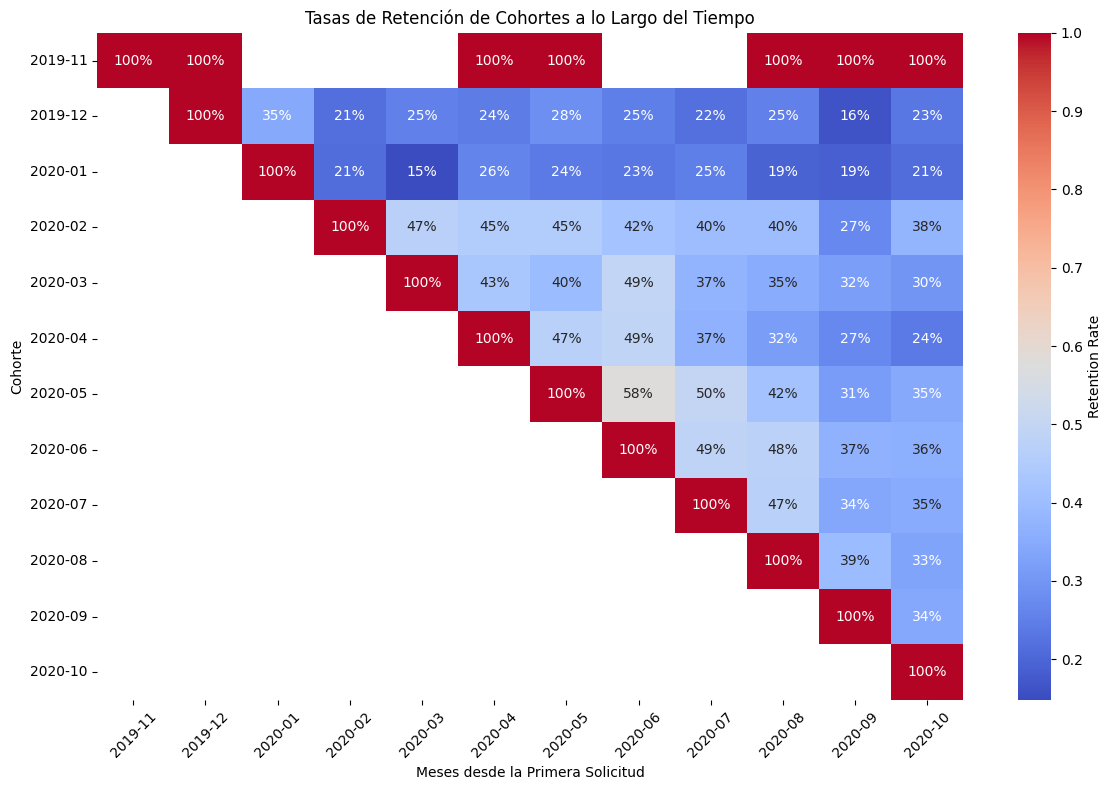

In [18]:
# Calcular el tamaño inicial de las cohortes (primer mes de cada cohorte)
cohort_ltv_monthly['Clientes_Iniciales'] = cohort_ltv_monthly.groupby('Cohorte')['Clientes'].transform('first')

# Calcular las tasas de retención
cohort_ltv_monthly['Retention_Rate'] = cohort_ltv_monthly['Clientes'] / cohort_ltv_monthly['Clientes_Iniciales']

# Crear una matriz de retención
retention_matrix = cohort_ltv_monthly.pivot(index='Cohorte', columns='Mes_created_at', values='Retention_Rate')

# Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    retention_matrix, 
    annot=True, 
    fmt='.0%', 
    cmap='coolwarm', 
    cbar_kws={'label': 'Retention Rate'}
)
plt.title('Tasas de Retención de Cohortes a lo Largo del Tiempo')
plt.xlabel('Meses desde la Primera Solicitud')
plt.ylabel('Cohorte')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

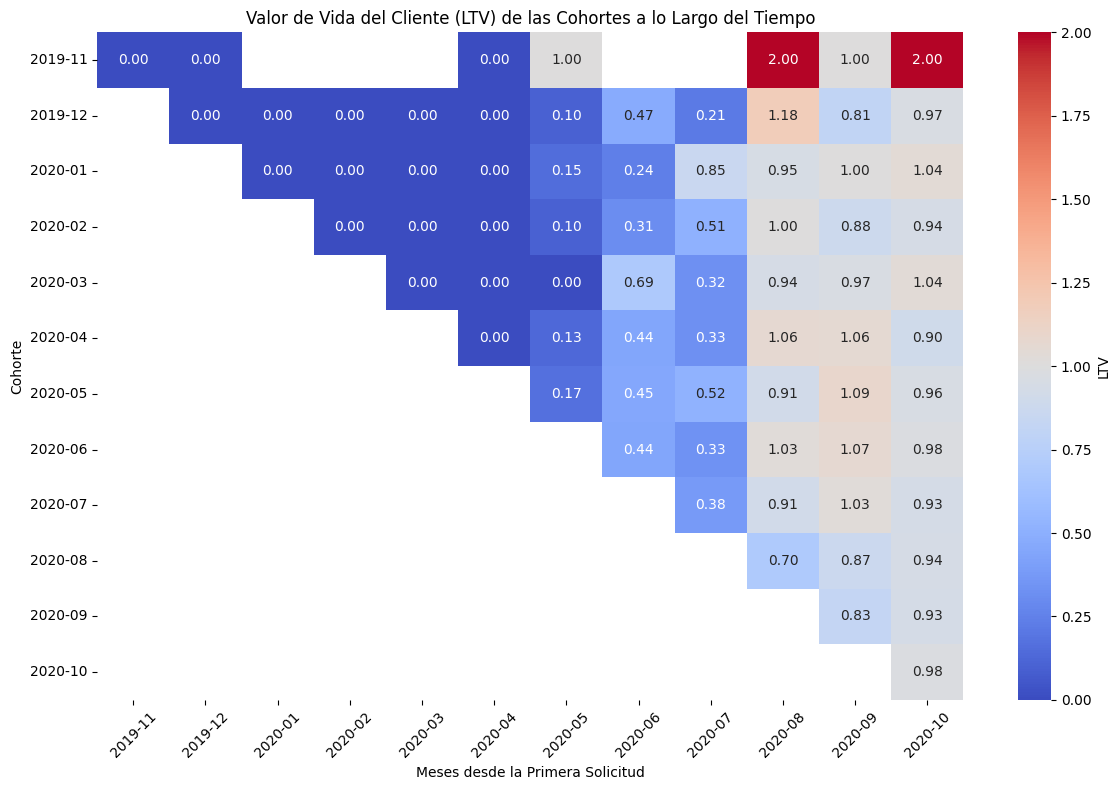

In [19]:
# Crear la matriz de LTV mensual
ltv_matrix = cohort_ltv_monthly.pivot(index='Cohorte', columns='Mes_created_at', values='LTV_Mensual')

# Crear el heatmap de LTV
plt.figure(figsize=(12, 8))
sns.heatmap(
    ltv_matrix, 
    annot=True, 
    fmt='.2f',  # Mostrar como número entero
    cmap='coolwarm', 
    cbar_kws={'label': 'LTV'}
)
plt.title('Valor de Vida del Cliente (LTV) de las Cohortes a lo Largo del Tiempo')
plt.xlabel('Meses desde la Primera Solicitud')
plt.ylabel('Cohorte')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
